In [76]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from numpy.linalg import norm
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import os
from pathlib import Path 
from sklearn.preprocessing import StandardScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage, TextArea
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from scipy.stats import pearsonr

In [77]:
train_features = "/home/ruijingyang/cytotox/eda_phase/lbp_experiments/train_features/compound_features"
label_mapping = "/home/ruijingyang/cytotox/eda_phase/lbp_experiments/label_mapping_all.csv"
testing_features = "/home/ruijingyang/cytotox/eda_phase/lbp_experiments/test_features/compound_features"
compound_label_map = pd.read_csv(label_mapping, index_col=None)
compound_label_map.head()

,Unnamed: 0,Object Id,Interpretation,label
0,0,ORM-0364078,non-toxic,non-toxic
1,1,ORM-0364078,non-toxic,non-toxic
2,2,ORM-0364074,non-toxic,non-toxic
3,3,ORM-0364074,non-toxic,non-toxic
4,4,ORM-0049279,"cytotoxic, mitotoxic",toxic


In [78]:
compound_label_map.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
compound_label_map

,index,Object Id,Interpretation,label
0,0,ORM-0364078,non-toxic,non-toxic
1,1,ORM-0364078,non-toxic,non-toxic
2,2,ORM-0364074,non-toxic,non-toxic
3,3,ORM-0364074,non-toxic,non-toxic
4,4,ORM-0049279,"cytotoxic, mitotoxic",toxic
5,5,ORM-0049279,"cytotoxic, mitotoxic",toxic
6,6,ORM-0120988,"cytotoxic, mitotoxic",toxic
7,7,ORM-0120988,"cytotoxic, mitotoxic",toxic
8,8,ORM-0140940,"cytotoxic, non-mitotoxic",toxic
9,9,ORM-0140940,"cytotoxic, non-mitotoxic",toxic


In [79]:
compound_label_map[compound_label_map['index']==(24 - 1)]['label'].values[0] == 'toxic'

True

In [28]:
compound_list = sorted(os.listdir(testing_features))

In [29]:
compound_list

['compound_01_features.npy',
 'compound_02_features.npy',
 'compound_03_features.npy',
 'compound_04_features.npy',
 'compound_05_features.npy',
 'compound_06_features.npy',
 'compound_07_features.npy',
 'compound_08_features.npy',
 'compound_09_features.npy',
 'compound_10_features.npy',
 'compound_11_features.npy',
 'compound_12_features.npy',
 'compound_13_features.npy',
 'compound_14_features.npy',
 'compound_15_features.npy',
 'compound_16_features.npy',
 'compound_17_features.npy',
 'compound_18_features.npy',
 'compound_19_features.npy',
 'compound_20_features.npy',
 'compound_21_features.npy',
 'compound_22_features.npy',
 'compound_23_features.npy',
 'compound_24_features.npy']

### load and prepare data for training

In [80]:
def prep_data_label(compound_list, feature_path):
    all_features = []
    all_labels = []

    for file_name in compound_list:
        file_path = os.path.join(feature_path, file_name)
        features = np.load(file_path)
        all_features.append(features)
        
        # get corresponding label
        compound_ind = file_name[9:11]
        # print(compound_ind)
        compound_label = 1 if compound_label_map[compound_label_map['index']==(int(compound_ind) - 1)]['label'].values[0] == 'toxic' else 0
        # print(f"compound index: {compound_ind}, label: {compound_label}")
        all_labels.append(compound_label)
        

    combined_features = np.vstack(all_features)


    print(combined_features.shape)
    # print(all_labels)
    return combined_features, all_labels

In [81]:
features_view1, labels_view1 = prep_data_label(sorted(os.listdir(train_features)), train_features)


(24, 800)


### Stratify train test data

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [104]:
features_scaled_view1, labels_view1 = preprocessing(features_view1, labels_view1)
features_scaled_view2, labels_view2 = preprocessing(features_view2, labels_view2)

In [87]:
# 划分训练和测试数据集
# X_train, X_test, y_train, y_test = train_test_split(features_scaled, all_labels, test_size=0.5, random_state=42)

In [108]:
X_train.shape

(24, 800)

In [109]:
X_test.shape

(24, 800)

In [110]:
# 创建和训练模型
lr_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)


# 评估模型
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)

# 打印混淆矩阵
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Confusion Matrix:
[[ 7  1]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.94      1.00      0.97        16

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24



In [111]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)

# 打印混淆矩阵
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
Confusion Matrix:
[[ 7  1]
 [ 2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.93      0.88      0.90        16

    accuracy                           0.88        24
   macro avg       0.86      0.88      0.86        24
weighted avg       0.88      0.88      0.88        24



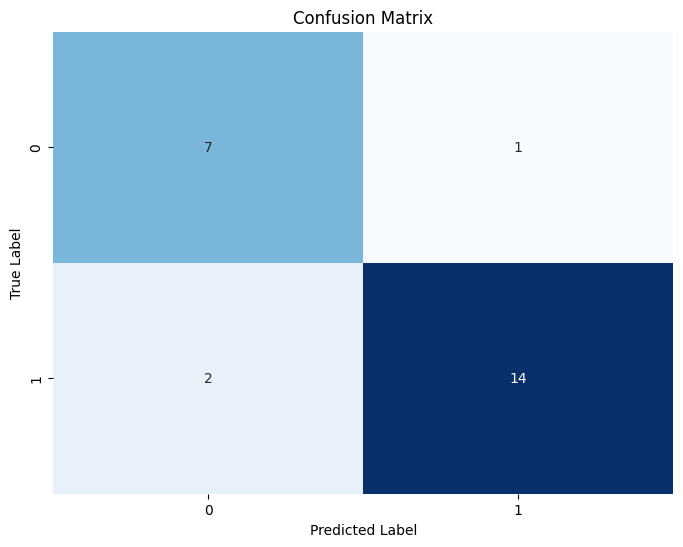

In [112]:
# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [93]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(all_features)

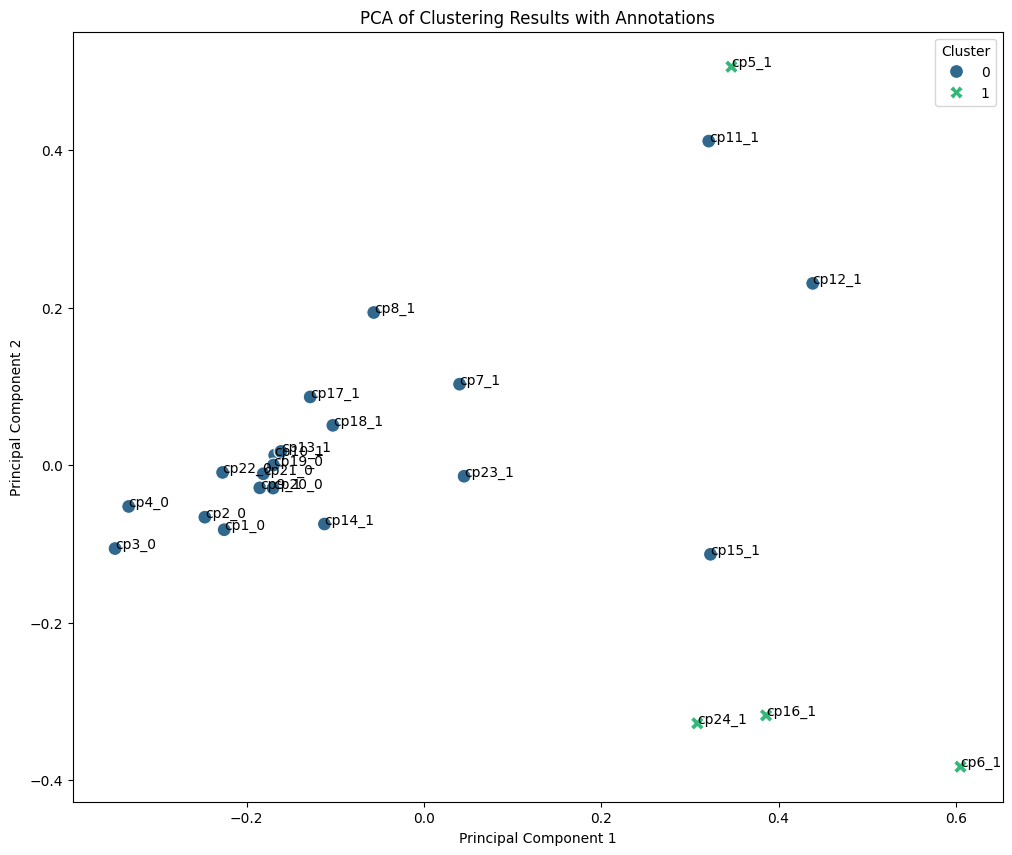

In [118]:
k = 3 

# 创建K-means聚类模型
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features_scaled)

# 获取聚类标签
labels = kmeans.labels_

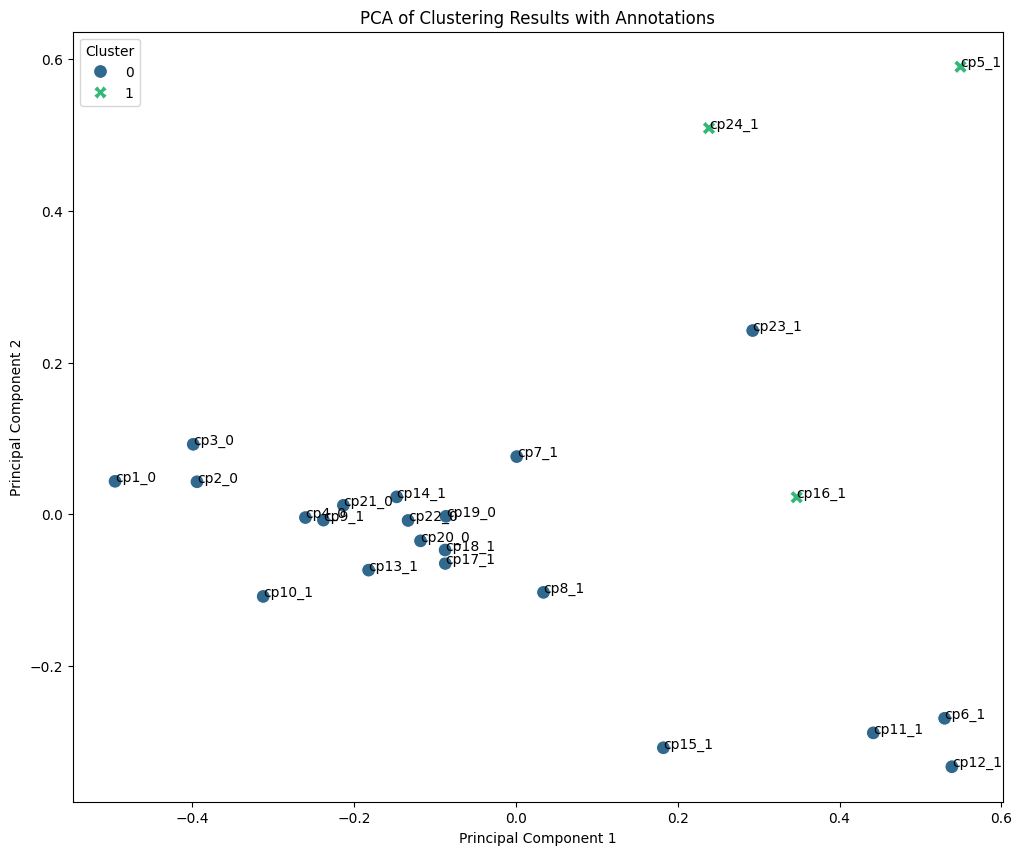

In [119]:
pca = PCA(n_components=10)
features_pca = pca.fit_transform(features_scaled)

# 绘制聚类结果
plt.figure(figsize=(12, 10))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=labels, style=labels, palette='viridis', s=100)

# 添加索引或类别标签
for i, text in enumerate(all_labels):  # 也可以使用range(len(features))获取索引
    show_text = f"cp{i+1}_{text}"
    plt.annotate(show_text, (features_pca[i, 0], features_pca[i, 1]))

plt.title('PCA of Clustering Results with Annotations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

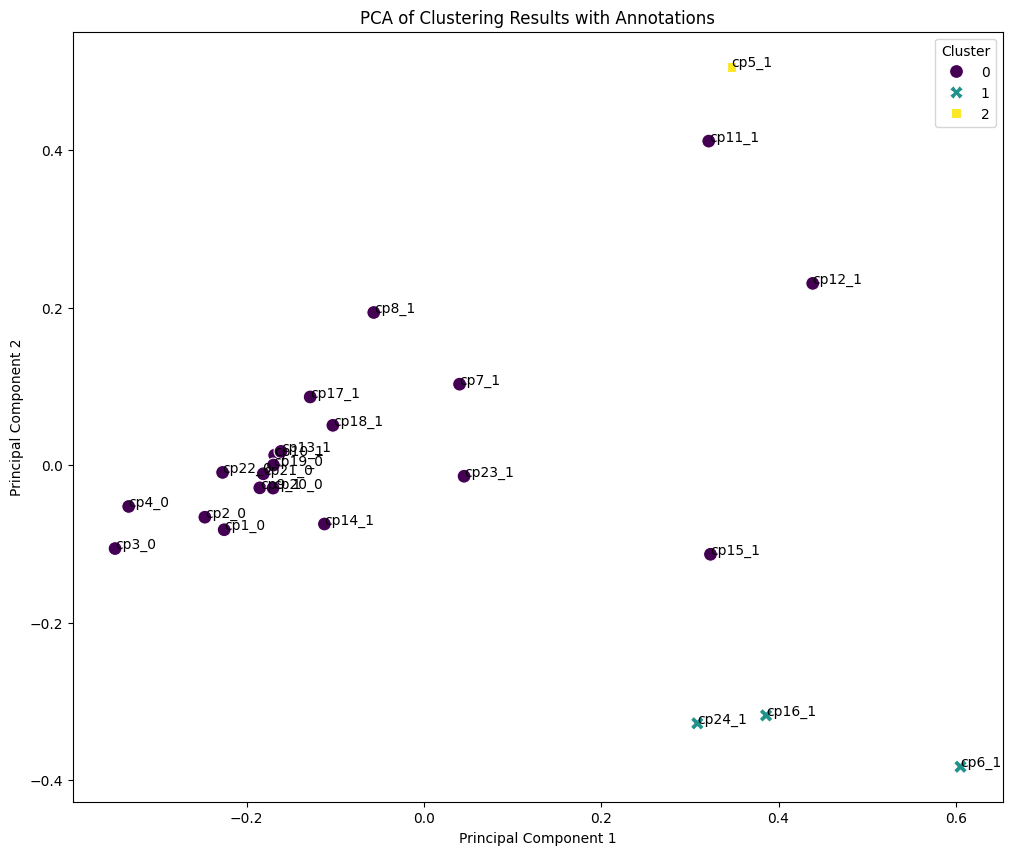

In [120]:
kmeans_visualization(3, features_view1, labels_view1, 'cluster_view1_k3')